<a href="https://colab.research.google.com/github/Adeseye1907/My_Project_Work/blob/main/Machine_Learning_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [3]:
ds = pd.read_csv('/content/5G_energy_consumption_dataset.csv')
ds.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [5]:
ds.describe()

,Energy,load,ESMODE,TXpower
count,92629.000000,92629.000000,92629.000000,92629.000000
mean,28.138997,0.244705,0.081361,6.765427
std,13.934645,0.234677,0.382317,0.309929
min,0.747384,0.000000,0.000000,5.381166
25%,18.236173,0.057370,0.000000,6.427504
50%,24.065770,0.165550,0.000000,6.875934
75%,35.724963,0.363766,0.000000,6.875934
max,100.000000,0.993957,4.000000,8.375336


In [6]:
!pip install ydata_profiling --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(ds, title= 'Pandas Profiling Report for Energy Consumption')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00,  7.36it/s]


In [ ]:
ds.isnull().sum()

,0
Time,0
BS,0
Energy,0
load,0
ESMODE,0
TXpower,0


In [ ]:
ds.dropna(axis = 0, inplace=True)
ds.isnull().sum()

,0
Time,0
BS,0
Energy,0
load,0
ESMODE,0
TXpower,0


In [ ]:
categorical = ds.select_dtypes(exclude = 'number')
numerical = ds.select_dtypes(include = 'number')

print('Categorical Data')
display(categorical.head())
print('\nNumeriacal Data')
display(numerical.head())

Categorical Data


,Time,BS
0,20230101 010000,B_0
1,20230101 020000,B_0
2,20230101 030000,B_0
3,20230101 040000,B_0
4,20230101 050000,B_0



Numeriacal Data


,Energy,load,ESMODE,TXpower
0,64.275037,0.487936,0.0,7.101719
1,55.904335,0.344468,0.0,7.101719
2,57.698057,0.193766,0.0,7.101719
3,55.156951,0.222383,0.0,7.101719
4,56.053812,0.175436,0.0,7.101719


In [ ]:
Data_duplicates = ds.duplicated()
Data_duplicates.sum()

np.int64(0)

In [ ]:
ds['z_score'] = stats.zscore(ds['TXpower'])
ds.head()

,Time,BS,Energy,load,ESMODE,TXpower,z_score
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719,1.085068
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719,1.085068
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719,1.085068
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719,1.085068
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719,1.085068


In [ ]:
outliers = ds[(ds['z_score'] > 3) | (ds['z_score'] < -3)]
outliers

,Time,BS,Energy,load,ESMODE,TXpower,z_score
13068,20230101 010000,B_119,13.901345,0.233900,0.0,5.680120,-3.501810
13069,20230101 020000,B_119,14.499253,0.135910,0.0,5.680120,-3.501810
13070,20230101 030000,B_119,13.751868,0.218260,0.0,5.680120,-3.501810
13071,20230101 050000,B_119,13.303438,0.050630,0.0,5.680120,-3.501810
13072,20230101 060000,B_119,13.452915,0.036510,0.0,5.680120,-3.501810
...,...,...,...,...,...,...,...
92608,20230102 180000,B_1007,46.487294,0.209391,0.0,8.034529,4.094838
92609,20230102 190000,B_1007,45.291480,0.196459,0.0,8.034529,4.094838
92610,20230102 200000,B_1007,43.049327,0.156353,0.0,8.034529,4.094838
92611,20230102 220000,B_1007,42.451420,0.157346,0.0,8.034529,4.094838


In [ ]:
#convert to categorical data using the LabelEncoder coding
# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ds['BS_encoded'] = le.fit_transform(ds['BS'])
ds.head()


,Time,BS,Energy,load,ESMODE,TXpower,z_score,BS_encoded
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719,1.085068,0
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719,1.085068,0
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719,1.085068,0
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719,1.085068,0
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719,1.085068,0


In [ ]:
#Using mean for encoding the categorical data
ds['BS_mean_TXpower'] = ds.groupby('BS')['TXpower'].transform('mean')
ds.head()


,Time,BS,Energy,load,ESMODE,TXpower,z_score,BS_encoded,BS_mean_TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719,1.085068,0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719,1.085068,0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719,1.085068,0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719,1.085068,0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719,1.085068,0,7.101719


In [ ]:
import pandas as pd

# Convert to datetime format
ds['Time'] = pd.to_datetime(ds['Time'], format='%Y%m%d %H%M%S')
ds.head()


,Time,BS,Energy,load,ESMODE,TXpower,z_score,BS_encoded,BS_mean_TXpower
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719,1.085068,0,7.101719
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719,1.085068,0,7.101719
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719,1.085068,0,7.101719
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719,1.085068,0,7.101719
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719,1.085068,0,7.101719


In [ ]:
#Converting the Time into Year, Month, Day and Hour
ds['Year'] = ds['Time'].dt.year
ds['Month'] = ds['Time'].dt.month
ds['Day'] = ds['Time'].dt.day
ds['Hour'] = ds['Time'].dt.hour
ds['Minute'] = ds['Time'].dt.minute
ds['DayOfWeek'] = ds['Time'].dt.dayofweek  # 0=Monday, 6=Sunday

ds.head()

,Time,BS,Energy,load,ESMODE,TXpower,z_score,BS_encoded,BS_mean_TXpower,Year,Month,Day,Hour,Minute,DayOfWeek
0,2023-01-01 01:00:00,B_0,64.275037,0.487936,0.0,7.101719,1.085068,0,7.101719,2023,1,1,1,0,6
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719,1.085068,0,7.101719,2023,1,1,2,0,6
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719,1.085068,0,7.101719,2023,1,1,3,0,6
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719,1.085068,0,7.101719,2023,1,1,4,0,6
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719,1.085068,0,7.101719,2023,1,1,5,0,6


In [ ]:
#Select the independent and dependent variable
X = ds[['Energy', 'load']]
y = ds['TXpower']

In [ ]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X = ds.drop(['TXpower', 'Time', 'BS'], axis=1)
y = ds['TXpower']

xtrain, xtest, ytrain,ytest = train_test_split(X, y, test_size = 0.2, random_state=40)
print(f'xtrain: {xtrain.shape}')
print(f'xtest: {xtest.shape}')
print(f'ytrain:{ytrain.shape}')
print(f'Ytest: {ytest.shape}')

xtrain: (74103, 12)
xtest: (18526, 12)
ytrain:(74103,)
Ytest: (18526,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
#Evaluate using the Xtrain
pred = linreg.predict(xtrain)
r2_score(ytrain, pred)

1.0

In [ ]:
#Xtest
pred = linreg.predict(xtest)
r2_score(ytest, pred)

1.0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Using the Evaluation Metrics
mae = mean_absolute_error(ytest, pred)
mse = mean_squared_error(ytest, pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2 Score: 1.00


R2 is 1 which means it is perfect.

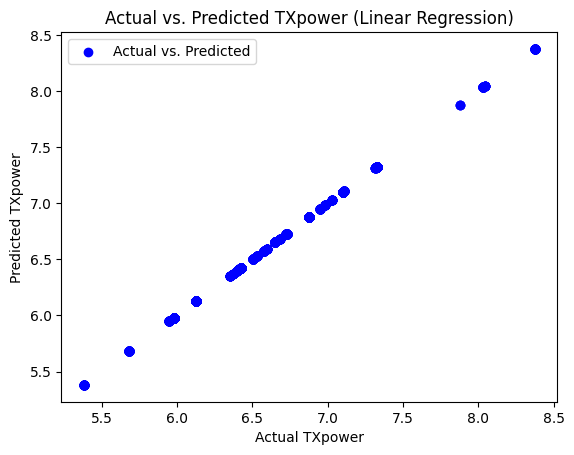

In [ ]:
plt.scatter(ytest, pred, color='blue', label='Actual vs. Predicted')
plt.xlabel("Actual TXpower")
plt.ylabel("Predicted TXpower")
plt.title("Actual vs. Predicted TXpower (Linear Regression)")
plt.legend()
plt.show()